# Final Exam - SS 3850G / CS 4414B - Undergraduate students

## Student ID: 250970798 (XX / 100)

## General comments

This Final integrates knowledge and skills acquired during the whole semester. You are allowed to use any document and source on your computer and look up documents on the internet. **You are NOT allowed to share documents, or communicate in any other way with people inside or outside the class during the exam.** To finish the exam in the alloted 3 hrs, you will have to work efficiently. **Read the entirety of each question carefully.** You need to be signed into the Final Zoom session during the entire exam with your video on and pointed at yourself. 

You need to submit the final by the due date (17:00) on OWL in the Test & Quizzes / Final section where you downloaded the data set and notebook. Late submission will be scored with 0 pts, unless you have received special accommodations. To avoid technical difficulties, start your submission at latest five to ten minutes before the deadline. To be sure, you can also submit multiple versions - only the latest version will be graded.  

Most question demand a **written answer** - answer these in a full English sentence. 

For your Figures, ensure that all axes are labeled in an informative way. 

Ensure that your code runs correctly by choosing "Kernel -> Restart and Run All" before submitting. 

### Additional Guidance

If at any point you are asking yourself "are we supposed to...", then *write your assumptions clearly in your exam and proceed according to those assumptions.*

Good luck!

In [1]:
## Preliminaries
# Sets up the environment by importing 
# pandas, numpy, matplotlib, searborn, sklearn, scipy.
# No other packages are allowed in solving the final.   

# Basics
import pandas as pd
import numpy as np

# Models and metrics
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import roc_curve, roc_auc_score, mean_squared_error
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# PyTorch
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset

# Plotting
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Data set

Credit scoring is one of the most common applications of statistical modeling / data science techniques. Predicting whether a potential borrower will repay their obligations or will not do so (called *default*) is one of the key activities in personal and small business lending.

During this exam, you will work with a sample of granted loans taken from a local bank, as part of a financial competition that ran back in 2013. The company sponsoring it made available the following variables:

1. SeriousDlqin2yrs (binary, target variable): 1 if the borrower experienced 90 days past due delinquency or worse (default), 0 otherwise.
2. RevolvingUtilizationOfUnsecuredLines (percentage): Total balance on credit cards and personal lines of credit except real estate and no installment debt like car loans divided by the sum of credit limits. 
3. age (integer): Age of borrower in years. 
4. NumberOfTime30-59DaysPastDueNotWorse (integer): Number of times borrower has been 30-59 days past due but no worse in the last 2 years.
5. DebtRatio (percentage): Monthly debt payments, alimony, living costs divided by monthy gross income.
6. NumberOfOpenCreditLinesAndLoans (integer): Number of Open loans (installment like car loan or mortgage) and Lines of credit (e.g. credit cards).
7. NumberOfTimes90DaysLate (integer): Number of times borrower has been 90 days or more past due.
8. NumberRealEstateLoansOrLines (integer): Number of mortgage and real estate loans including home equity lines of credit. 
9. NumberOfTime60-89DaysPastDueNotWorse (integer): Number of times borrower has been 60-89 days past due but no worse in the last 2 years.
10. NumberOfDependents (integer): Number of dependents in family excluding themselves (spouse, children etc.)

You get a sample of 1000 cases with a 50% default rate. The cases are stored in the attached csv file (```gsc_sample.csv```)

With this information, execute the following tasks using your knowledge from the course.


In [2]:
# Uncomment this line if using cloud installation (Colab or others)
# !gdown https://drive.google.com/uc?id=1_9tztEp7v1wBJTH91xZpTS_QDgdp4mN0

In [3]:
# Read the data
gsc_sample = pd.read_csv('gsc_sample.csv')
gsc_sample.describe()

,SeriousDlqin2yrs,age,NumberOfTime3059DaysPastDueNotWorse,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime6089DaysPastDueNotWorse,NumberOfDependents,RevolvingUtilizationOfUnsecuredLines,DebtRatio
count,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,0.50000,49.632000,0.757000,6744.346000,8.670000,0.42700,1.026000,0.330000,0.92200,0.468928,0.365071
std,0.50025,13.829166,3.303462,11396.666095,5.065645,3.22041,1.152672,3.170986,1.18715,0.403894,0.325817
min,0.00000,22.000000,0.000000,1100.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,0.00000,39.000000,0.000000,3457.750000,5.000000,0.00000,0.000000,0.000000,0.00000,0.080844,0.145849
50%,0.50000,49.000000,0.000000,5180.000000,8.000000,0.00000,1.000000,0.000000,0.00000,0.374469,0.291640
75%,1.00000,59.000000,1.000000,8000.000000,11.000000,0.00000,2.000000,0.000000,2.00000,0.877077,0.489728
max,1.00000,92.000000,98.000000,250000.000000,30.000000,98.00000,9.000000,98.000000,6.00000,2.297612,2.639328


## Task 1 (30 pts)
Before we start working on a predictive models for whether somebody will default on a loan or not, in task 1 we will first build a model to predict the typical monthly income. Income is notoriously difficult to obtain, as people may have different sources of income, so it holds value to create income prediction models. Ultimately this model maybe useful in spotting whether somebody is in the typical income bracket. One of the main predictors of income is age, so we focus on this variable and later consider some additional variables. 

### Question 1.1 (5pts)
* Generate a bivariate scatter plot of age (x-axis) and Monthly Income (y-axis). You should be able to see two extreme observations. [1pt]
* Exclude the two observations from the data set and regenerate your bivariate scatter plot. [1pt]
* **Written answer: Is the distribution of Monthly income symmetric or skewed?** [1pt]
* **Written answer: Given the presence of outliers and the shape of the distribution of the target variable, would you prefer a L2-loss or an L1-loss for your regression model? How will the prediction of each of these models differ? Which technique will give a prediction that is closer to the median income?** [2pts]

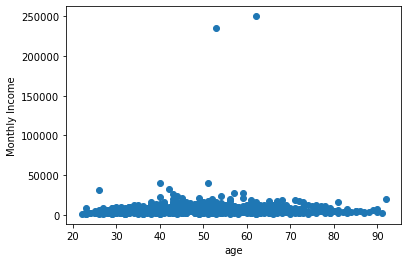

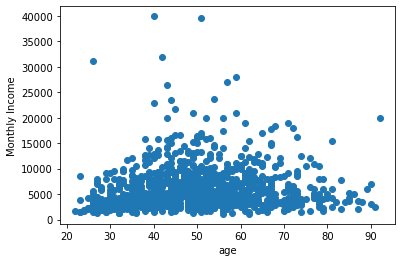

In [4]:
# Your code here. You can add as many cells as you want.
fig1, ax1 = plt.subplots()
ax1.scatter(gsc_sample.age,gsc_sample.MonthlyIncome)
ax1.set_xlabel("age")
ax1.set_ylabel("Monthly Income")
gsc_new=gsc_sample[(gsc_sample.MonthlyIncome<200000)]
fig2, ax2 = plt.subplots()
ax2.set_xlabel("age")
ax2.set_ylabel("Monthly Income")
ax2.scatter(gsc_new.age,gsc_new.MonthlyIncome)


**Your written answers here**
The distribution of Monthly Income is skewed.
I will prefer l1 loss for my regression model, because l1 loss is robust against outliers. Then these outliers will not negatively affect our model. If the model uses l1 loss, then the model will not be hugely affected by the two outliers. If the age is between 50 and 70, the predicted monthly income will not become very large(>200000). However, if the model uses l2 loss, the model will be affected by these outliers. As a result, the predicted monthly income will be larger for age 50-70 in comparison to other age groups. l1-loss will give a prediction closer to the median income.

### Question 1.2 (13pts)
As a solution to the distribution of Monthly income, you chose the following practical solution: 
* Exclude the two highest earning cases.
* Transform the target variable from income to the natural logarithm of the monthly income.

Implement these two steps. All subsequent questions in this task will be done over this reduced and transformed data set 

To build and evaluate a baseline model take the following steps: 
* Split the data into an equal-sized training and test set (500 observations each). Use a random_state of 1.
* Build a model that predicts the log income as a quadratic function of age. To get full points, implement the feature construction and model in a pipeline  
* Fit the model using an squared-error loss (L2)
* Plot the training data and the fit of the model
* Calculate and report the mean-squared error for the test set 
* Using the Central limit theorem or bootstrap, calculate and report the 95% Confidence interval of the mean test error

In [5]:
# Your code here. You can add as many cells as you want.

from sklearn.base import BaseEstimator, TransformerMixin



gsc_new.describe()
gsc_new["MonthlyIncome"]=np.log(gsc_new["MonthlyIncome"])
gsc_new.describe()

class Age2(BaseEstimator,TransformerMixin):  
    def fit(self,X,y=None):
        return self
    
    def transform(self,X,y=None):
        X = X.assign(age2 = X.age**2)
        return X



D_train,D_test=train_test_split(gsc_new,test_size=0.5,random_state=1)
X_train=D_train[["age"]]

model = Pipeline([
    ('Age2', Age2()),
    ('linear_regression', LinearRegression())
])



model.fit(X_train,D_train.MonthlyIncome)




<ipython-input-5-cffd7a754092>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gsc_new["MonthlyIncome"]=np.log(gsc_new["MonthlyIncome"])


Pipeline(steps=[('Age2', Age2()), ('linear_regression', LinearRegression())])

mean squared error is 0.32486671282816854
Norm ci: [0.26494259954292415, 0.3847908261134129]


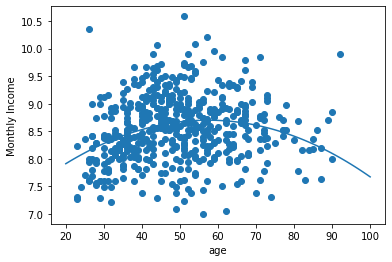

In [6]:
fig3,ax3=plt.subplots()
ax3.scatter(X_train,D_train.MonthlyIncome)
p_wt=pd.DataFrame(np.linspace(20,100,80),columns=["age"])
pred_Y=model.predict(p_wt)
ax3.plot(p_wt,pred_Y)
ax3.set_xlabel("age")
ax3.set_ylabel("Monthly Income")
X_test=D_test[["age"]]
print("mean squared error is",mean_squared_error(D_test.MonthlyIncome,model.predict(X_test)))
spec=mean_squared_error(D_test.MonthlyIncome,model.predict(X_test))
def squarederror(y,ypred):
    return ((y-ypred)**2)
# Get mean and std of test loss 
loss=squarederror(D_test.MonthlyIncome,model.predict(X_test))

std=loss.std()
stderr =np.sqrt(std/500)
critval = 1.96
norm_ci = [spec - critval*stderr, 
           spec + critval*stderr]
print(f"Norm ci: {norm_ci}")

### Question 1.3 (6pts)
Now increase the model complexity by using a 5th-order polynomial on age to predict monthly income. 
As in Question 1.2, plot the fit on the training data and report the mean squared error on the test data. 

**Written answer: Does a 5th-order polynomial offer a better model than the quadratic model in Question 1.2? Which model would you prefer? Justify your answer.**


In [7]:
# Your code here. You can add as many cells as you want.
model2 = Pipeline([
    ('poly', PolynomialFeatures(degree=5, include_bias=False)),
    ('linear_regression', LinearRegression())
])



model2.fit(X_train,D_train.MonthlyIncome)

Pipeline(steps=[('poly', PolynomialFeatures(degree=5, include_bias=False)),
                ('linear_regression', LinearRegression())])

mean squared error is 0.32438792509986136


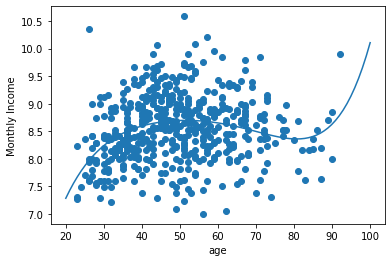

In [8]:
fig4,ax4=plt.subplots()
ax4.scatter(X_train,D_train.MonthlyIncome)
p_wt=pd.DataFrame(np.linspace(20,100,80),columns=["age"])
pred_Y=model2.predict(p_wt)
ax4.plot(p_wt,pred_Y)
ax4.set_xlabel("age")
ax4.set_ylabel("Monthly Income")
X_test=D_test[["age"]]
print("mean squared error is",mean_squared_error(D_test.MonthlyIncome,model2.predict(X_test)))
spec=mean_squared_error(D_test.MonthlyIncome,model2.predict(X_test))

**Your written answer here**
Mean squared error does not change a lot when we increase the degree of polynomial. 5th-order polynomial model is doing a little bit better than quadratic model. However, i would still prefer quadratic model, because 5th-order polynomial model might overfit the data. Then our model will not be accurate when we try to predict other peoples' monthly incomes.

### Question 1.4 (6pts)
You boss tells you that he only wants to use your predictive algorithm, if the predicted mean squared test error on a completely novel data set is lower than 0.33 and the 95% confidence interval does not include that value. Since you have not achieved this so far, you give your code, the training and test data set to a colleague of yours (Carl). He uses your code to play around with the number of polynomial terms for age, numberOfDependents, as well as the number and form of interaction terms. Finally he finds a model including 25 features that minimizes the test error. He then conducts a boostrap analysis to obtain a 95% confidence interval on that test error. In his final report he writes: 

*The final model has a predicted test error on unseen data of 0.29. The 95% confidence internal is 0.26 - 0.32 and the new algorithm should therefore meet the required criterion of producing a squared error of lower than 0.33 on novel data with high certainty.*  

**Written answer:  What is the problem with Carl's approach and statement? What would you have to change in the model fitting / selection / evaluation procedure to fix the problem?** 

**Your answer here**
Firstly, he did feature selection using the test error. We should never do that, we should do crossvalidation when we are doing feature selection. Secondly, he should also pay attention to the posssibility of overfitting. 25 features might cause the model to overfit the data. As a result, he might want to have more test data to make sure that his model does not overfit. 

## Task 2: Tree-based ensemble (40 pts)

Now we will begin to model default. We will model it using a tree-based ensemble. After careful consideration, you have decided to use an XGBoosting model to create it.

### Question 2.1: XGB vs Random Forest (5 pts)

**Written answer: Why do you think XGBoosting is a better alternative than Random Forests for this particular database? Answer in terms of the number of cases, the number of variables and the properties of each model.**

**Your answer here**

Firstly, our sample size and number of variables is not very large. We have 11 variables and 1000 cases. We know that boosting works better than random forest when the sample size is small. Therefore, our small sample size makes XGBoosting a better alternative than random forests. Also XGBoosting emulates gradient descent. It is different from random forest which create trees with random subsets of features and we average predictions from these trees.. Therefore XGBoosting can quickly find the most optimal solution (the model with lowest error).

### Question 2.2: Finding the best XGB model (20 pts)

One of your colleagues has previously done an analysis of the best parameters that can be used for the model, and has limited the choice to four potential configurations: a max_depth parameter of 3, a learning_rate value of either 0.01 or 0.1, and an n_estimators (number of trees) of either 50 trees or 200 trees. Your colleague used a random_state seed value of 20212004 everywhere possible. All the other parameters can be set at the values appropriate for a binary model seen in the course.

You will now determine which of these configurations is the best for your work. For this:

a. Starting from the original data (i.e. not using the output from Task 1), create a train / test split leaving 300 cases in the test set. (2 pts)

b. Create a parameter grid that can test the values that you need to test. (5 pts)

c. Run a grid-search using this configuration and get the values of the best parameters. Use the whole training set you created in a for this search, do not create a smaller sample. Show the value of the best parameters. (*Hint: As you will be using the whole training set, you can get the best estimator directly from the ```GridSearchCV``` object by setting the option ```refit=True```. The best estimator is then stored in the ```GRID_SEARCH_OBJECT.best_estimator_``` property, where ```GRID_SEARCH_OBJECT``` is the name of your GridSearchCV object*). (13 pts)

In [9]:
# Your code here. You can add as many cells as you want.
from xgboost import XGBRegressor

D_train,D_test=train_test_split(gsc_sample,test_size=300,random_state=20212004)
XGB =        XGBClassifier(max_depth=3,                 # Depth of each tree
                          learning_rate=0.1,            # How much to shrink error in each subsequent training. Trade-off with no. estimators.
                          n_estimators=100,             # How many trees to use, the more the better, but decrease learning rate if many used.
                          random_state=20212004,        # Seed
                          n_jobs=1
                          )
param_grid=dict({'learning_rate':[0.01,0.1],
            'n_estimators':[50,200]
    
            })


gscv = GridSearchCV(XGB, param_grid=param_grid, cv = 10, scoring = 'neg_mean_squared_error',refit=True)
gscv.fit(D_train.drop("SeriousDlqin2yrs",axis="columns"),D_train.SeriousDlqin2yrs)

/Users/yuchenzhou/opt/miniconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/yuchenzhou/opt/miniconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/yuchenzhou/opt/miniconda3/lib/python3.8/site-packag

[16:44:45] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1614844528294/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:44:45] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1614844528294/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:44:45] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1614844528294/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:44:45] WARNING: /Users/runner/miniforge3/cond

/Users/yuchenzhou/opt/miniconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/yuchenzhou/opt/miniconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/yuchenzhou/opt/miniconda3/lib/python3.8/site-packag

[16:44:45] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1614844528294/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:44:45] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1614844528294/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:44:45] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1614844528294/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:44:45] WARNING: /Users/runner/miniforge3/cond

/Users/yuchenzhou/opt/miniconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/yuchenzhou/opt/miniconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:44:45] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1614844528294/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:44:45] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1614844528294/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/yuchenzhou/opt/miniconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/yuchenzhou/opt/miniconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:44:45] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1614844528294/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:44:45] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1614844528294/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/yuchenzhou/opt/miniconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/yuchenzhou/opt/miniconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:44:46] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1614844528294/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:44:46] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1614844528294/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/yuchenzhou/opt/miniconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/yuchenzhou/opt/miniconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:44:46] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1614844528294/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:44:46] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1614844528294/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/yuchenzhou/opt/miniconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/yuchenzhou/opt/miniconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:44:46] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1614844528294/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:44:46] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1614844528294/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/yuchenzhou/opt/miniconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/yuchenzhou/opt/miniconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/yuchenzhou/opt/miniconda3/lib/python3.8/site-packag

[16:44:47] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1614844528294/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:44:47] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1614844528294/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:44:47] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1614844528294/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/yuchenzhou/opt/miniconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/yuchenzhou/opt/miniconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/yuchenzhou/opt/miniconda3/lib/python3.8/site-packag

[16:44:47] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1614844528294/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:44:47] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1614844528294/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:44:47] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1614844528294/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:44:47] WARNING: /Users/runner/miniforge3/cond

/Users/yuchenzhou/opt/miniconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/yuchenzhou/opt/miniconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/yuchenzhou/opt/miniconda3/lib/python3.8/site-packag

[16:44:47] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1614844528294/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:44:47] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1614844528294/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:44:47] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1614844528294/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/yuchenzhou/opt/miniconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/yuchenzhou/opt/miniconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:44:47] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1614844528294/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:44:47] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1614844528294/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/yuchenzhou/opt/miniconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/yuchenzhou/opt/miniconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:44:47] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1614844528294/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:44:48] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1614844528294/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/yuchenzhou/opt/miniconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/yuchenzhou/opt/miniconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:44:48] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1614844528294/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:44:48] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1614844528294/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/yuchenzhou/opt/miniconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/yuchenzhou/opt/miniconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:44:48] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1614844528294/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:44:48] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1614844528294/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/yuchenzhou/opt/miniconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/yuchenzhou/opt/miniconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:44:48] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1614844528294/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:44:49] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1614844528294/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=0.1, max_delta_step=None,
                                     max_depth=3, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=1,
                                     num_parallel_tree=None,
                                     random_state=20212004, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
                                     subsample=None, tree_method=None,
 

In [10]:
print(gscv.best_params_)
print("the best parameters are",gscv.best_params_)

{'learning_rate': 0.01, 'n_estimators': 200}
the best parameters are {'learning_rate': 0.01, 'n_estimators': 200}


### Question 2.3: Evaluating the model (10 pts)

Now that you have a model, you must check how well it works and evaluate it in the context of this problem. Perform the following tasks:

a. Apply the best model to the test set to obtain the probability of default for each element. (2pt)

b. Create a ROC curve plot that shows the value of the AUC you obtained. **Written answer: What can you say about the model performance?** (4pts)

c. Create a variable importance plot showing which variables contribute the most to the model prediction. (4pts)

In [11]:
# Apply to the test set
bestXGB =        XGBClassifier(max_depth=3,                 # Depth of each tree
                          learning_rate=0.01,            # How much to shrink error in each subsequent training. Trade-off with no. estimators.
                          n_estimators=200,             # How many trees to use, the more the better, but decrease learning rate if many used.
                          random_state=20212004,        # Seed
                          )

bestXGB.fit(D_train.drop("SeriousDlqin2yrs",axis="columns"),D_train.SeriousDlqin2yrs)
probability=bestXGB.predict_proba(D_test.drop("SeriousDlqin2yrs",axis="columns"))

[16:44:49] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1614844528294/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/yuchenzhou/opt/miniconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


0.8956173526140155

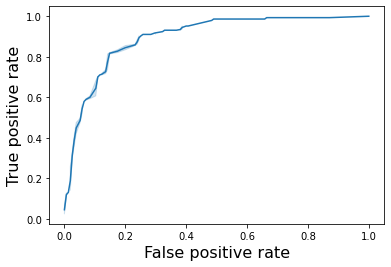

In [12]:
# Plot the ROC curve and show the AUC
fpr,tpr,_=roc_curve(D_test.SeriousDlqin2yrs,probability[:,1],pos_label=1)
ax=sns.lineplot(fpr,tpr)

ax.set_xlabel('False positive rate', fontsize = 16)
ax.set_ylabel('True positive rate', fontsize = 16)
roc_auc_score(D_test.SeriousDlqin2yrs,probability[:,1])

**Your written answer here**
The model performance is good. AUC score is high. True positive rate is over 90% when the false positive rate is only 30-40%. Therefore, a high true positive rate does not cause the false postive rate to be very high.

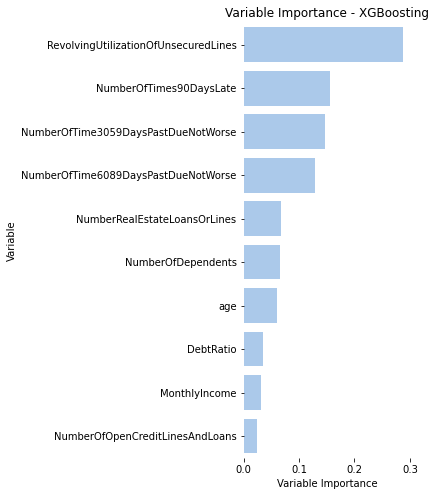

In [13]:
# Create the variable importance plot
# Variable importance
importances =bestXGB.feature_importances_
indices = np.argsort(importances)[::-1] 
Xtrain=D_train.drop("SeriousDlqin2yrs",axis="columns")
f, ax = plt.subplots(figsize=(3, 8))
plt.title("Variable Importance - XGBoosting")
sns.set_color_codes("pastel")
sns.barplot(y=[Xtrain.columns[i] for i in indices], x=importances[indices], 
            label="Total", color="b")
ax.set(ylabel="Variable",
       xlabel="Variable Importance")
sns.despine(left=True, bottom=True)

In [14]:
print("RevolvingUtilizationOfUnsecuredLines contributes the most to the model prediction.")

RevolvingUtilizationOfUnsecuredLines contributes the most to the model prediction.


### Question 2.4: Fairness (5 pts)

Your colleague Carl says that you probably neglected to include the full zipcode as a predictive variable in the model. You know this is a bad idea due to fairness concerns. Explain to your colleague what are the issues with including such a variable to make real-world decisions in the context of model fairness. In this context, explain what we would need to see in the model decisions to achieve Demographic Parity, Equalized Opportunities, and Equalized Odds for the protected characteristics (gender, ethnicity, religion, etc).

(*Hint: Remember that the full zipcode allows identifying particular neighborhoods, and those neighborhoods can have specific ethnicities and gender compositions*)

**Your answer here*

If we include such variable to our model, our model may make dedcisions based on ethnicities and genders of neighborhoods. As a result, this may cause biases when the model tries to make decisions for a person with specific gender or ethnicity. We do not want this kind of model unfairness occurs. For demographic parity, we want to see that the probability of being defaulted is independent of these protected characteristics. For equalized odds, we want to see that the trues positive rates and false positive rates for different protected attributes are equal. For equalized opportunities, we want to see that only the true postive rates for different protected attributes are equal.Then we are treating fairly to those people who are worth of being defaulted.

## Task 3: Unsupervised learning (30 pts)

After you have corrected him twice, Carl has now argued you should not construct just one model but several ones, as you probably have several disjoint clusters in your data. Your colleague says running a clustering model will clearly show this.

To test your colleague's idea, you propose to run a K-Means model and using dimensionality reduction to plot the resulting analysis.

### Question 3.1 Data normalization (5 pts)

Explain why it is a good idea to normalize the data for a K-Means clustering process. Then train a ```MinMaxScaler``` method over your full dataset ```gsc_sample```, excluding the target variable. Transform the data and make a new Data Frame containing the transformed variables. 

**Your written answer here**

Some variables in the data are much larger than other variables. Then those variables with large values will dominate the clustering process. As a result normalizing the data can solve this problem by making all variables weight the same.

In [15]:
# Your code here. You can add as many cells as you want.


minmax=MinMaxScaler()

scaled_data=minmax.fit_transform(gsc_sample.drop("SeriousDlqin2yrs",axis="columns"))


### Question 3.2 K-Means Clustering (15 pts)

Your colleague has mentioned they think there are between three and five clusters in the data. You decide to run a silhouette analysis over the data to answer these questions. Create a silhouette plot for 3, 4 and 5 clusters and calculate the corresponding silhouette scores. Use a random seed of 20210420 for your cluster functions.

**Written answer: According to the silhouette analysis, do you think 3, 4 or 5 clusters provide a better description of the data? Why?**

For n_clusters = 3 The average silhouette_score is : 0.21773089494657705
For n_clusters = 4 The average silhouette_score is : 0.21731628413237747
For n_clusters = 5 The average silhouette_score is : 0.20017856862895395


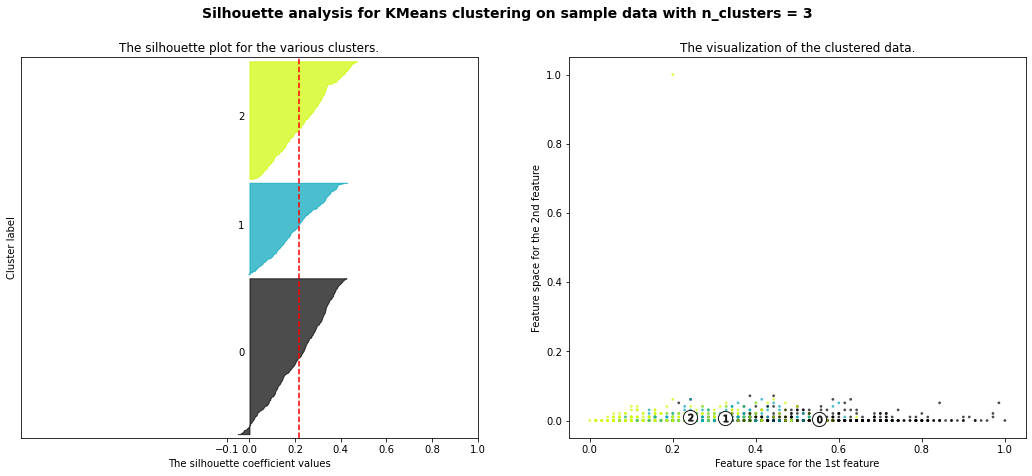

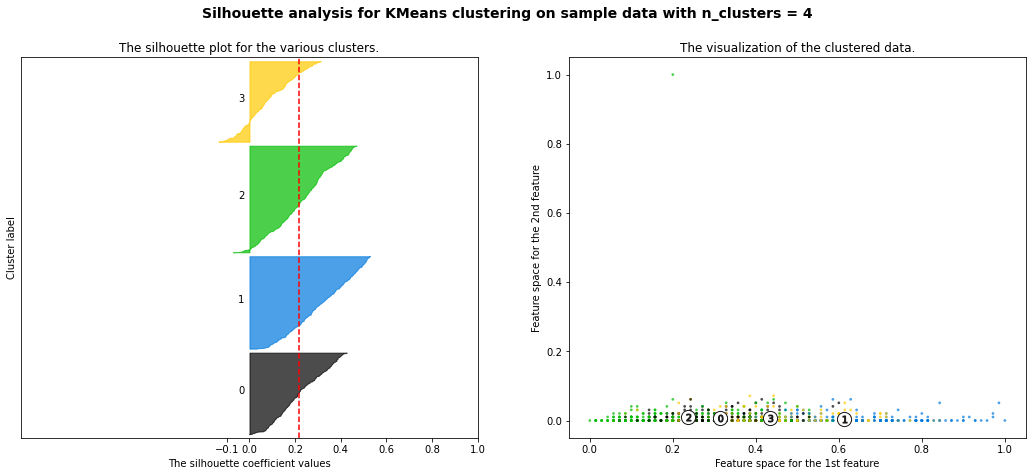

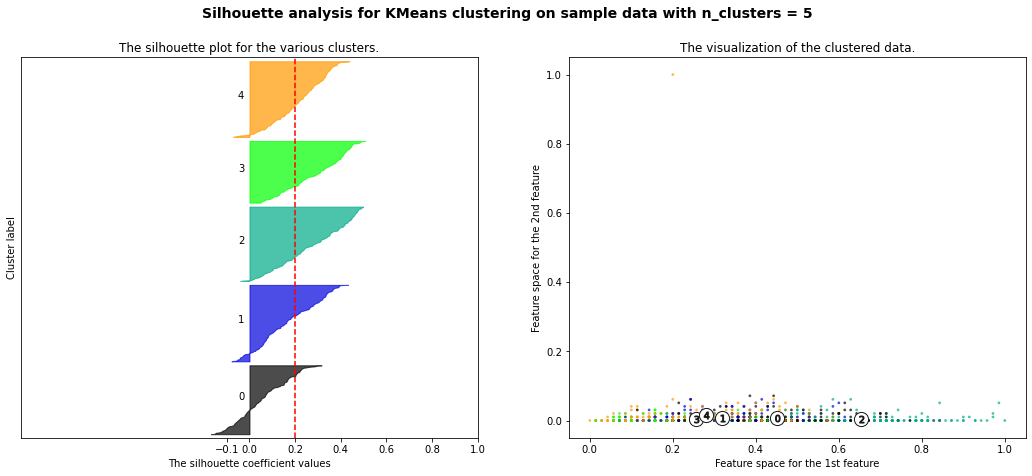

In [16]:
# Your code here. You can add as many cells as you want.

range_n_clusters = [3,4,5]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(scaled_data) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=20210420)
    cluster_labels = clusterer.fit_predict(scaled_data)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(scaled_data, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(scaled_data, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(scaled_data[:, 0], scaled_data[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

**Your written answer here**

i think 4 clusters provide better clustering. Firstly, 3 clusters leads to a large cluster, but 4 clusters leads to clusters that have similar width. Therefore, 4 clusters is better. Secondly, 4 clusters leads to clusters that are not very far from average. If we increase the number of clusters to 5, 4 out of 5 clusters are far away from average. As a result, 4 cluster provides a better description of data.

### Question 3.3: Visualizing your cluster model (10 pts)

After running the above analysis you have decided a certain number of clusters. However, you are not convinced these clusters are actually well-defined groups. You decide to visualize the clusters to identify whether there are actually any groups at all.

a. Run a PCA model over the normalized data keeping two components. Show the percentage of explained variance of these two components. (5 pts)

b. Create a scatterplot using these two components as axes of the plot, colouring the points of the plot depending on which cluster they belong to. (2 pts)

c. **Written answer: Do you think there are real, distinct clusters in the data? Why or why not? To achieve a good prediction, do you think you need to create a separate predictive model for each cluster? Or would a single predictive model for the entire data set be enough? (3 pts)**

percentage of explained variance of these two components is 55.13934410439748 %


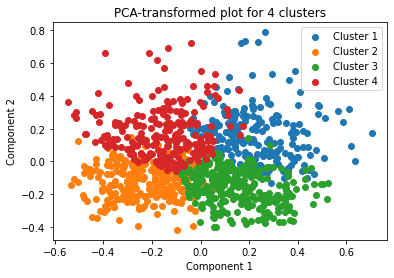

In [17]:
# Your code here. You can add as many cells as you want.

PCA_transformer = PCA(2)
PCA_data = PCA_transformer.fit_transform(scaled_data)

print("percentage of explained variance of these two components is",np.cumsum(PCA_transformer.explained_variance_ratio_)[1] * 100,"%")

# For three clusters.
n_clusters = 4
clusterer = KMeans(n_clusters=n_clusters, random_state=20210420)
cluster_labels = clusterer.fit_predict(scaled_data)

# Plot!
for i in range(n_clusters):
    color = cm.nipy_spectral(float(i) / n_clusters)
    plt.scatter(PCA_data[cluster_labels==i, 0], PCA_data[cluster_labels==i, 1], 
                label='Cluster %i' % (i+1))

plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('PCA-transformed plot for %i clusters' % n_clusters)
plt.legend()

**Your written answer here**

I do not think that there are real distinct clusters in the data. You can see that most of the data are concentrated at the center of the scatter plot. And some points that are classified as one cluster overlaps with other points that are classified as other cluters. For example, some points in the middle (in red) belongs to cluster 4 but you can see that many green, blue, and orange pointes overlap with these red points. Therefore our classifier cannot distinguish those points in the middle into distinct clusters. Because there are not distinct clusters in our data, we do not need to create separate predictive model. We can treat all data as a single cluster. Then we just use a single model for the entier dataset. 